<p>Group: Data Wizards</p>
<p>Members: Aída Martínez and Amanda Chang</p>
<h1>San Francisco Crime Classification.</h1>

San Francisco was well known during the decades of 1930 to 1960 for Alcatraz and its dangerous criminals. Nowadays it has become a hub in technology and it is known more for white collar crimes.
Our project aims to analyze and show some crime statistics through a range of visualizations. Furthermore, we want to predict the category of crime given a set of features and using decision trees.

In [51]:
%matplotlib inline
#Import pandas and numpy
import pandas as pd
import numpy as np
 
#Load train and test data with pandas
#Use parse_dates to parse the first column into datetime
SF_train_data = pd.read_csv('train.csv', parse_dates = ['Dates'])

#Show the first lines to see the data structure
SF_train_data.head(1)

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599


In [52]:
#look for missing values in each column.
#0 means no missing values.
SF_train_data.isnull().sum()

Dates         0
Category      0
Descript      0
DayOfWeek     0
PdDistrict    0
Resolution    0
Address       0
X             0
Y             0
dtype: int64

In [53]:
#Look for duplicate rows on the training dataset
duplicate = pd.DataFrame.duplicated(SF_train_data)
print len(duplicate[duplicate == True])
#Drop all duplicate rows
SF_train_data = SF_train_data.drop_duplicates()

2323


In [54]:
#Calculate the crime category frequency
categories = SF_train_data.groupby('Category')
#Total records for each category
categoriesFreq = categories.size() 
#Summary of the main statistics
categoriesFreq.describe()

count        39.000000
mean      22454.512821
std       37970.535660
min           6.000000
25%        1185.500000
50%        4380.000000
75%       28531.500000
max      174320.000000
dtype: float64

In [55]:
#Get the count of records for crime Category
pd.value_counts(SF_train_data.Category.values).head(10)

LARCENY/THEFT     174320
OTHER OFFENSES    125960
NON-CRIMINAL       91915
ASSAULT            76815
DRUG/NARCOTIC      53919
VEHICLE THEFT      53706
VANDALISM          44581
WARRANTS           42145
BURGLARY           36600
SUSPICIOUS OCC     31394
dtype: int64

In [56]:
#Calculate the crime frequency by day of week
dayOfWeek = SF_train_data.groupby('DayOfWeek')
#Total records for each day of week
dayOfWeekFreq = dayOfWeek.size().sort_index()
#Statistics summary
dayOfWeekFreq.describe()

count         7.000000
mean     125103.714286
std        5396.993753
min      116394.000000
25%      122953.000000
50%      124757.000000
75%      127649.000000
max      133371.000000
dtype: float64

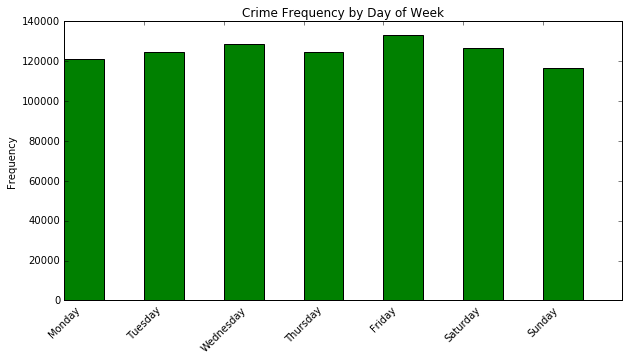

In [57]:
import matplotlib.pyplot as plt

N = 7
#Reorder the day of the week
myorder=[1,5,6,4,0,2,3]
dayOfWeek = np.arange(N) 
#Plot the crime frequency by day of week using a bar graph
fig, ax1= plt.subplots(figsize=(10,5))
ax1.bar(dayOfWeek, dayOfWeekFreq[myorder], 0.5, color='green')

#Add some text for title and axes
ax1.set_ylabel('Frequency')
ax1.set_title('Crime Frequency by Day of Week')
#Define the x labels
ax1.set_xticklabels(('Monday', 'Tuesday', 'Wednesday', 'Thursday', 
                     'Friday', 'Saturday', 'Sunday'), rotation=45)

In [58]:
#Create the crime frequency by Pd District
PdDistrict = SF_train_data.groupby('PdDistrict')
#Total records for each Pd District
PdDistrictFreq = PdDistrict.size() 
#Statistics summary
PdDistrictFreq.describe()

count        10.000000
mean      87572.600000
std       33316.203086
min       45080.000000
25%       68730.500000
50%       83454.500000
75%      101103.250000
max      156528.000000
dtype: float64

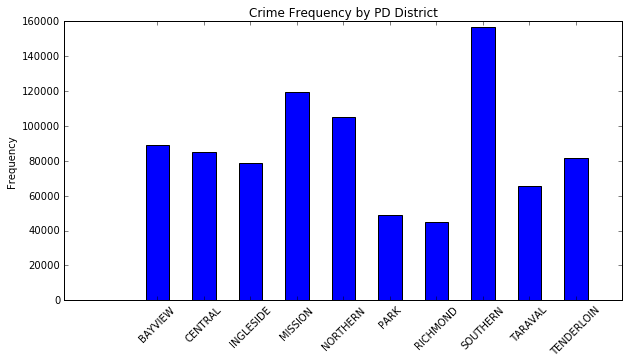

In [59]:
N = 10
pdDistricts = np.arange(N) 
#Plot the crime frequency by Pd District
fig, ax1= plt.subplots(figsize=(10, 5))
ax1.bar(pdDistricts, PdDistrictFreq, 0.5, color='blue', align='center')

#Add some text for title and axes
ax1.set_ylabel('Frequency')
ax1.set_title('Crime Frequency by PD District')
ax1.set_xticks(pdDistricts)
ax1.set_xticklabels(('BAYVIEW', 'CENTRAL', 'INGLESIDE', 'MISSION', 
                     'NORTHERN', 'PARK', 'RICHMOND', 
                     'SOUTHERN', 'TARAVAL', 'TENDERLOIN'), rotation=45)

In [60]:
#Calculate the resolution frequency
Resolution = SF_train_data.groupby('Resolution')
ResolutionFreq = Resolution.size()
#Calculate the unique resolution labels and sort them alphabetically
resolutionLabels = pd.unique(SF_train_data.Resolution.ravel())
resolutionLabels.sort()

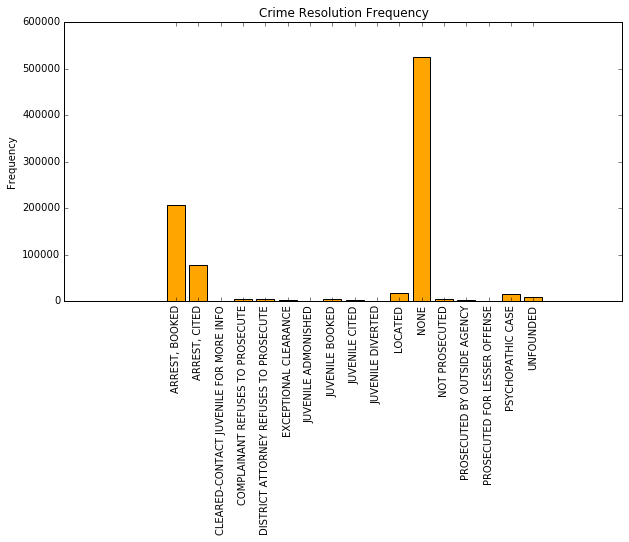

In [61]:
N = 17
resolution = np.arange(N) 
#Plot the crime frequency by resolution
fig, ax1= plt.subplots(figsize=(10, 5))
ax1.bar(resolution, ResolutionFreq, 0.8, color='orange', align='center')

#Add some text for title and axes
ax1.set_ylabel('Frequency')
ax1.set_title('Crime Resolution Frequency')
ax1.set_xticks(resolution)
ax1.set_xticklabels(('ARREST, BOOKED', 'ARREST, CITED', 
                     'CLEARED-CONTACT JUVENILE FOR MORE INFO',
                     'COMPLAINANT REFUSES TO PROSECUTE',
                     'DISTRICT ATTORNEY REFUSES TO PROSECUTE', 
                     'EXCEPTIONAL CLEARANCE','JUVENILE ADMONISHED', 
                     'JUVENILE BOOKED', 'JUVENILE CITED',
                     'JUVENILE DIVERTED', 'LOCATED', 'NONE', 
                     'NOT PROSECUTED', 'PROSECUTED BY OUTSIDE AGENCY',
                     'PROSECUTED FOR LESSER OFFENSE', 'PSYCHOPATHIC CASE',
                     'UNFOUNDED'), rotation=90)

In [62]:
#Cross-tabulate Category and PdDistrict
SF_crosstab = pd.crosstab(SF_train_data.PdDistrict, SF_train_data.Category, margins=True)
SF_crosstab.head(4)

Category,ARSON,ASSAULT,BAD CHECKS,BRIBERY,BURGLARY,DISORDERLY CONDUCT,DRIVING UNDER THE INFLUENCE,DRUG/NARCOTIC,DRUNKENNESS,EMBEZZLEMENT,...,STOLEN PROPERTY,SUICIDE,SUSPICIOUS OCC,TREA,TRESPASS,VANDALISM,VEHICLE THEFT,WARRANTS,WEAPON LAWS,All
PdDistrict,,,,,,,,,,,,,,,,,,,,,
BAYVIEW,393,9845,34,56,3914,218,179,4496,243,100,...,397,37,3903,3,635,5344,7199,4319,1645,89098
CENTRAL,111,6971,65,12,4499,494,160,1805,517,178,...,510,60,2841,1,904,4451,4208,2776,486,85267
INGLESIDE,182,8522,32,53,3327,171,206,2372,190,78,...,347,65,3166,0,415,5363,8950,2522,1130,78722
MISSION,144,11146,46,66,3736,1097,357,8750,782,124,...,631,72,3807,1,1017,5273,7134,6605,1329,119723


In [63]:
#Group the train data set by Address
address = SF_train_data.groupby('Address')
print address.size().head(5)
print address.size().tail(5)

Address
0 Block of  HARRISON ST     1
0 Block of 10TH AV          5
0 Block of 10TH ST         49
0 Block of 11TH ST         48
0 Block of 12TH AV          7
dtype: int64
Address
ZENO PL / FOLSOM ST     3
ZOE ST / BRANNAN ST    10
ZOE ST / BRYANT ST     10
ZOE ST / FREELON ST     4
ZOE ST / WELSH ST       3
dtype: int64


In [64]:
#Create new column call IsCorner which identifies a St/Av from an intersection.
SF_train_data['IsIntersection'] = SF_train_data['Address'].str.contains('/')

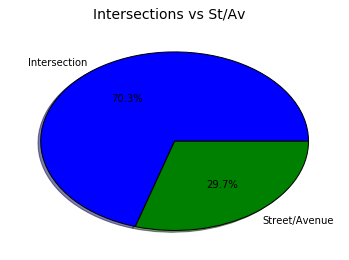

In [65]:
#Define the labels for the graph
labels = 'Intersection', 'Street/Avenue'
fracs = SF_train_data.groupby('IsIntersection').size()
#Plot a pie graph
plt.pie(fracs, labels=labels, autopct='%1.1f%%', shadow=True)
plt.suptitle('Intersections vs St/Av', fontsize=14)

In [66]:
#Create new columns with the year, month, day and hour
SF_train_data['Year'] = SF_train_data['Dates'].dt.year
SF_train_data['Month'] = SF_train_data['Dates'].dt.month
SF_train_data['Day'] = SF_train_data['Dates'].dt.day
SF_train_data['Hour'] = SF_train_data['Dates'].dt.hour

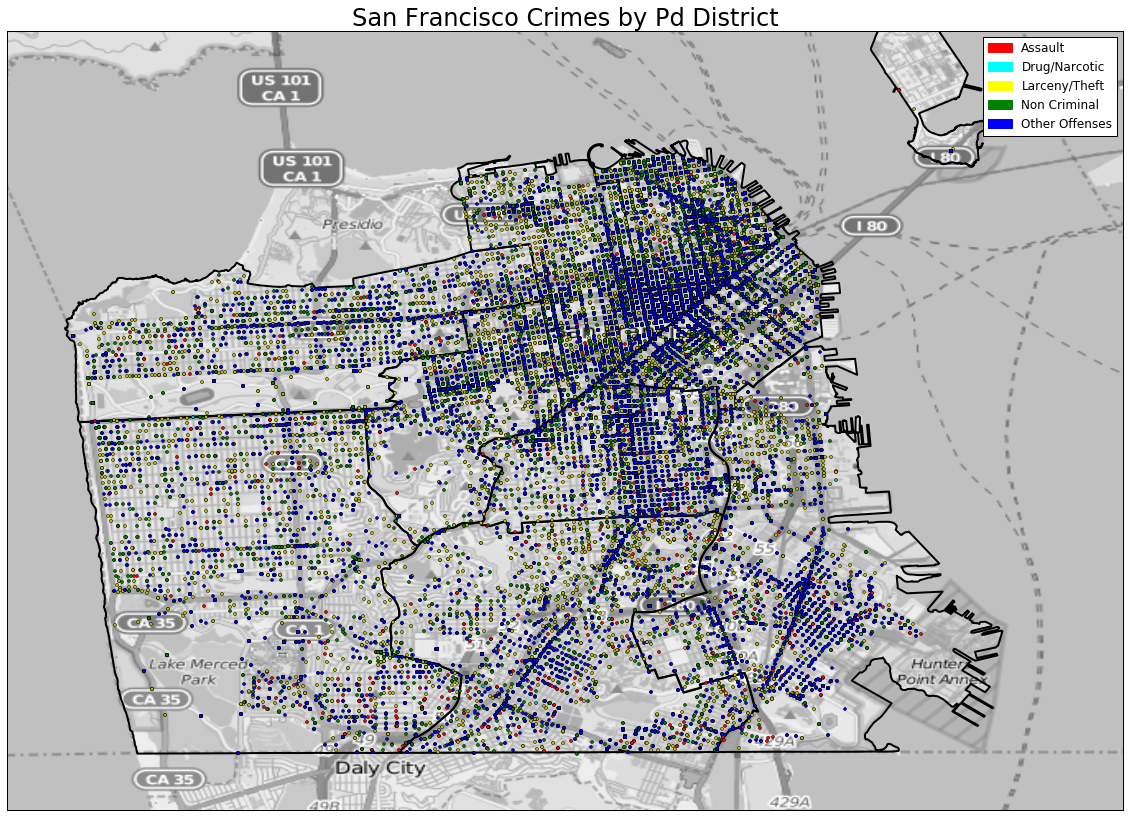

In [67]:
# Import Basemap
from mpl_toolkits.basemap import Basemap
from PIL import Image
import matplotlib.patches as mpatches

# Create a figure with specific size
fig = plt.figure(figsize=(20,14))

# Create a map, using the Cylindrical Equidistant projection, 
map = Basemap(projection='cyl',
                  resolution = 'h',
                  llcrnrlon = -122.52469, #Inferior corner lon
                  llcrnrlat = 37.69862, #Inferior corner lat
                  urcrnrlon = -122.33663, #Superior corner lon
                  urcrnrlat = 37.82986, #Superior corner lat
                  lat_0=37.752303,
                  lon_0=-122.445576)

#SUbsetting by crime category and Year 2014
Assault = SF_train_data[(SF_train_data['Category'] == 'ASSAULT') & 
                        (SF_train_data['Year'] == 2014)]
DrugNarcotics = SF_train_data[(SF_train_data['Category'] == 'DRUG/NARCOTIC') & 
                              (SF_train_data['Year'] == 2014)]
LarceniesThefts = SF_train_data[(SF_train_data['Category'] == 'LARCENY/THEFT') & 
                                (SF_train_data['Year'] == 2014)]
NonCriminal = SF_train_data[(SF_train_data['Category'] == 'NON-CRIMINAL') & 
                            (SF_train_data['Year'] == 2014)]
OtherOffenses = SF_train_data[(SF_train_data['Category'] == 'OTHER OFFENSES') & 
                              (SF_train_data['Year'] == 2014)]

#Define the longitude and latitude points
xAssault,yAssault = map(Assault['X'].values, 
                        Assault['Y'].values)
xDrugNarcotics,yDrugNarcotics = map(DrugNarcotics['X'].values, 
                                    DrugNarcotics['Y'].values)
xLarceniesThefts,yLarceniesThefts = map(LarceniesThefts['X'].values, 
                                        LarceniesThefts['Y'].values)
xNonCriminal,yNonCriminal = map(NonCriminal['X'].values, 
                                NonCriminal['Y'].values)
xOtherOffenses,yOtherOffenses = map(OtherOffenses['X'].values, 
                                    OtherOffenses['Y'].values)

#Plot the longitude and latitude points
map.plot(xAssault, yAssault, 'ro', markersize=3)
map.plot(xDrugNarcotics, yDrugNarcotics,'co', markersize=3)
map.plot(xLarceniesThefts, yLarceniesThefts,'yo', markersize=3)
map.plot(xNonCriminal, yNonCriminal,'go', markersize=3)
map.plot(xOtherOffenses, yOtherOffenses,'bo', markersize=3)

#Define the map title
plt.title('San Francisco Crimes by Pd District', fontsize=24)

# Show the map
mapdata = np.loadtxt("sf_map_copyright_openstreetmap_contributors.txt")
plt.imshow(mapdata, 
          cmap = plt.get_cmap('gray'), 
          extent=[-122.52469, -122.33663, 37.69862, 37.82986])

#Add legends to the map
red_patch = mpatches.Patch(color='red', label='Assault')
cyan_patch = mpatches.Patch(color='cyan', label='Drug/Narcotic')
yellow_patch = mpatches.Patch(color='yellow', label='Larceny/Theft')
green_patch = mpatches.Patch(color='green', label='Non Criminal')
blue_patch = mpatches.Patch(color='blue', label='Other Offenses')

#Define the legends for the map
plt.legend(handles=[red_patch, cyan_patch, yellow_patch, green_patch, blue_patch])

#Plot the Pd district divisions
map.readshapefile('sfpd_districts1', 'PdDistricts',  linewidth=2)

plt.show()

<h3>Standard Scaler</h3>

Standardization of datasets is a common requirement for many machine learning 
estimators implemented in the scikit; they might behave badly if the individual 
features do not more or less look like standard normally distributed data: 
    Gaussian with zero mean and unit variance.
In practice we often ignore the shape of the distribution and just transform 
the data to center it by removing the mean value of each feature, then scale it 
by dividing non-constant features by their standard deviation.
Reference: http://scikit-learn.org/stable/modules/preprocessing.html

In [68]:
from sklearn import preprocessing

#Define a Standard Scaler instance 
xy_scaler=preprocessing.StandardScaler()
#Compute mean and std
xy_scaler.fit(SF_train_data[["X","Y"]])
#Perform standardization by centering and scaling
SF_train_data[["X","Y"]] = xy_scaler.transform(SF_train_data[["X","Y"]])
SF_train_data = SF_train_data[abs(SF_train_data["Y"])<100]
SF_train_data.index=range(len(SF_train_data))

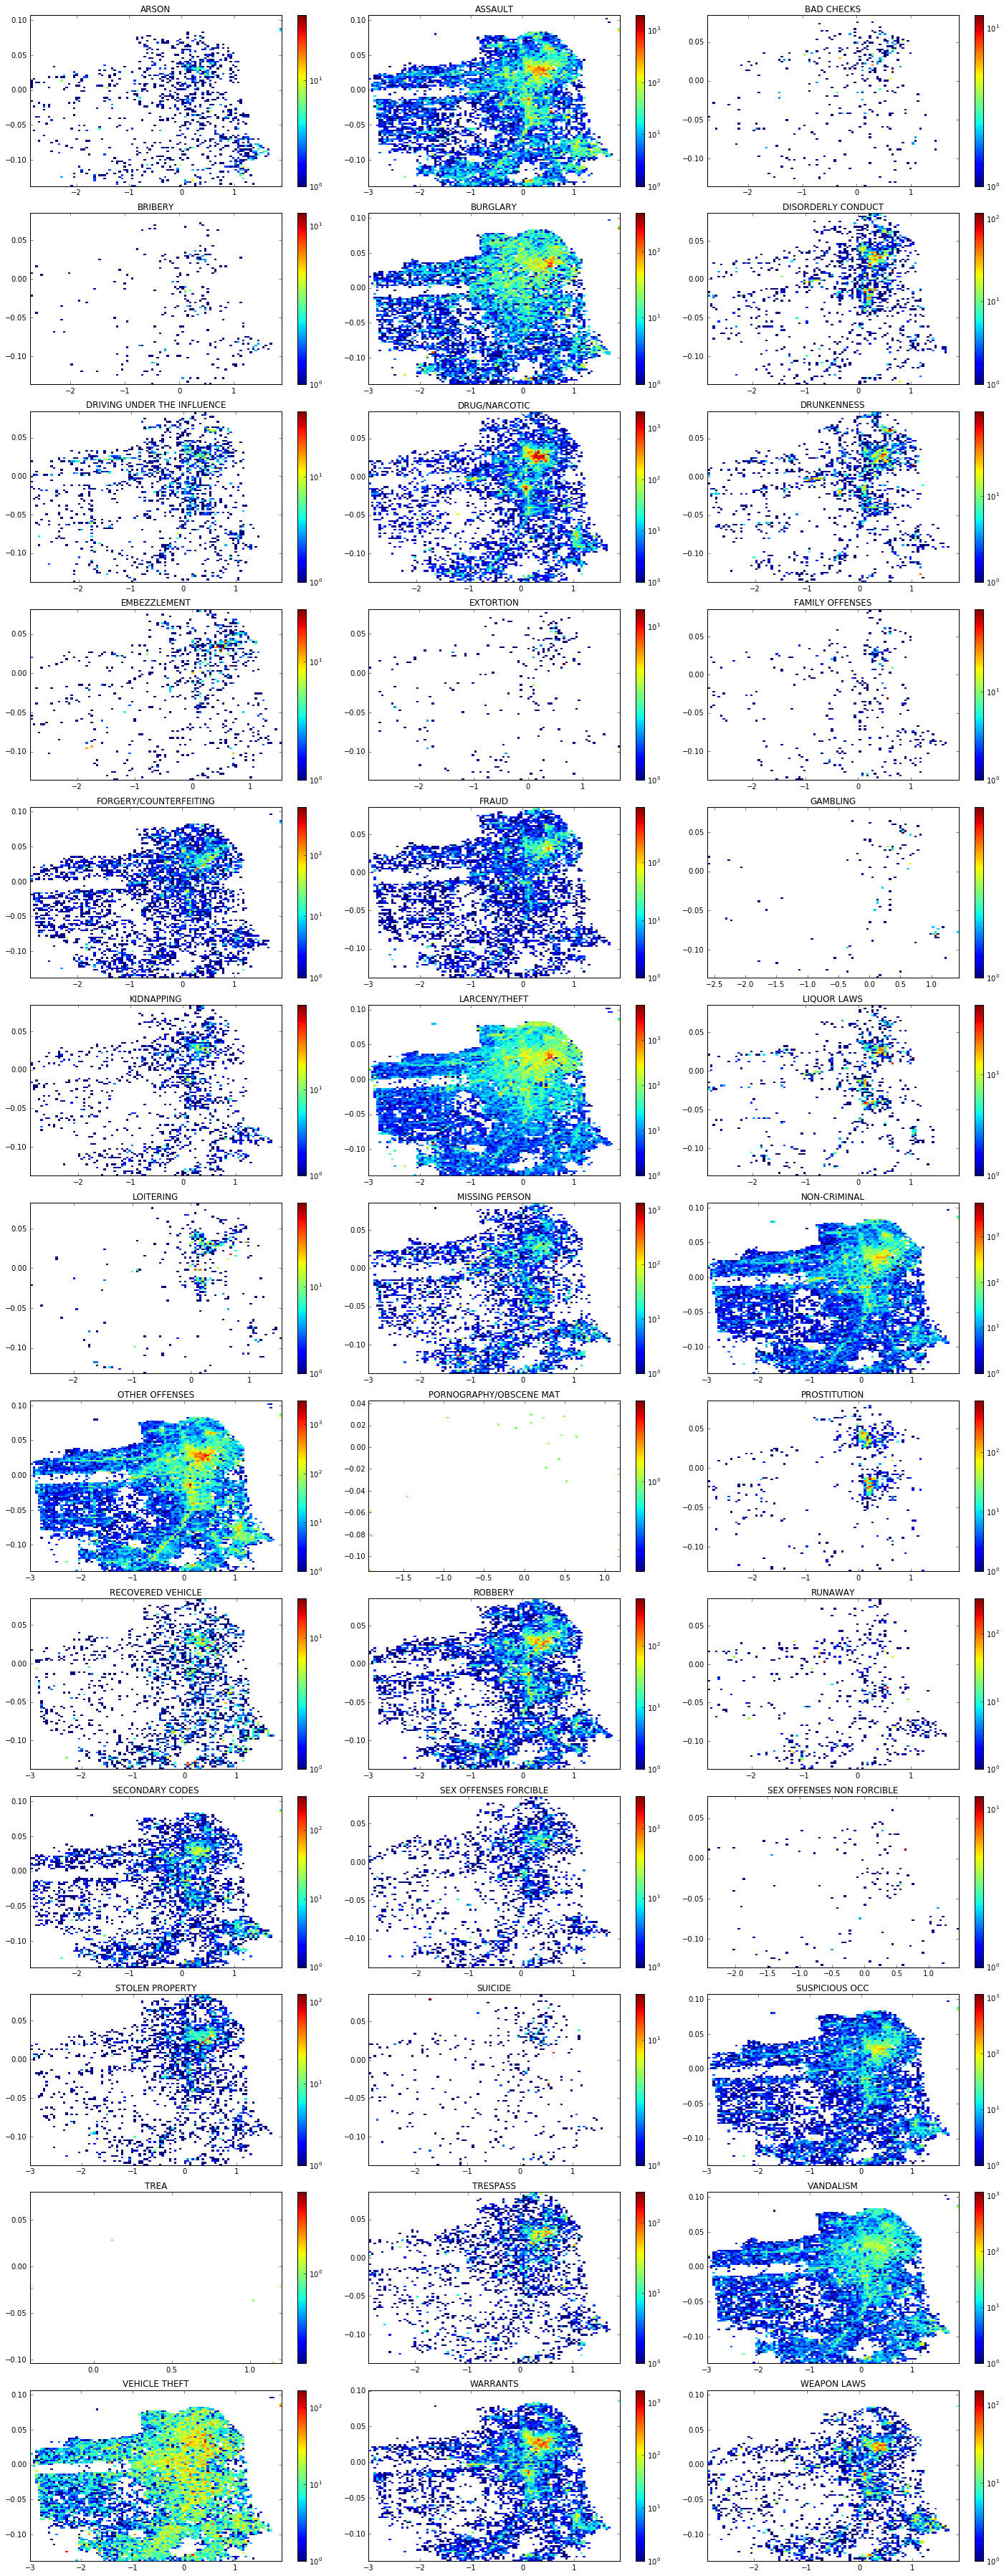

In [19]:
from matplotlib.colors import LogNorm

categories = SF_train_data.groupby('Category')
pos=1
#Define the size of the figure
fig = plt.figure(figsize=(20, 50))
fig.subplots_adjust(left=0.2, bottom=0.1)

for name, category in categories:
    #Add a new subplot for each crime category
    ax1 = fig.add_subplot(13, 3, pos)
    ax1.set_title(name)
    histo, xedges, yedges = np.histogram2d(np.array(category.X),
                                           np.array(category.Y), 
                                           bins=(100,100))
    myextent  =[xedges[0],xedges[-1],yedges[0],yedges[-1]]
    #Plot the heat map
    cax = ax1.imshow(histo.T, 
                     origin='low', 
                     interpolation='nearest', 
                     extent = myextent,
                     aspect='auto', 
                     norm=LogNorm())
    #Draw the color bar next to the heat map
    cbar = fig.colorbar(cax)
    pos+=1

#Fix the aligment of the subplots
fig.tight_layout()

#Get rid of categories temporary dataset 
del categories

In [69]:
#Create a new datasets only with the most frequent crimes
criteria = SF_train_data['Category'].map(lambda x: x in 
            ('LARCENY/THEFT', 'ASSAULT', 'DRUG/NARCOTIC', 
             'OTHER OFFENSES', 'NON-CRIMINAL'))
crimes_subset = SF_train_data[criteria]

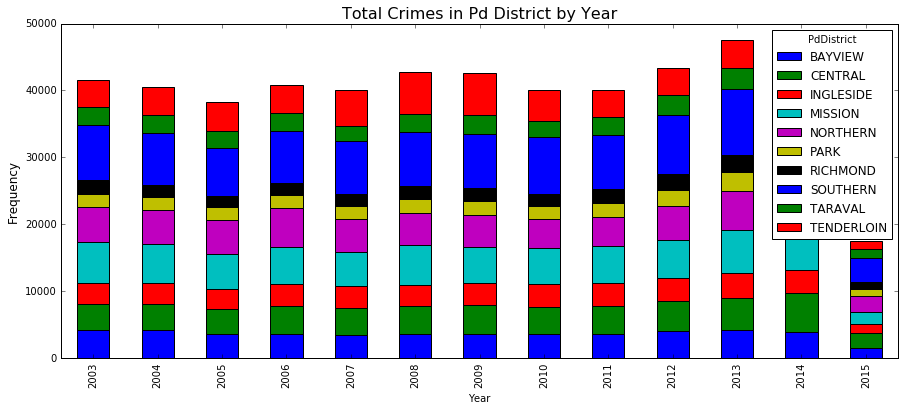

In [70]:
#Plot the crimes frequency by Pd District by Year
year_pdDistrict = crimes_subset.groupby(['Year','PdDistrict']).size()
year_pdDistrict_plot = year_pdDistrict.unstack().plot(
                                kind='bar', 
                                figsize=(15, 6), 
                                stacked=True)
#Set text for title and axes
year_pdDistrict_plot.set_xlabel("Year")
year_pdDistrict_plot.set_ylabel("Frequency", fontsize=12)
year_pdDistrict_plot.set_title("Total Crimes in Pd District by Year",fontsize=16)

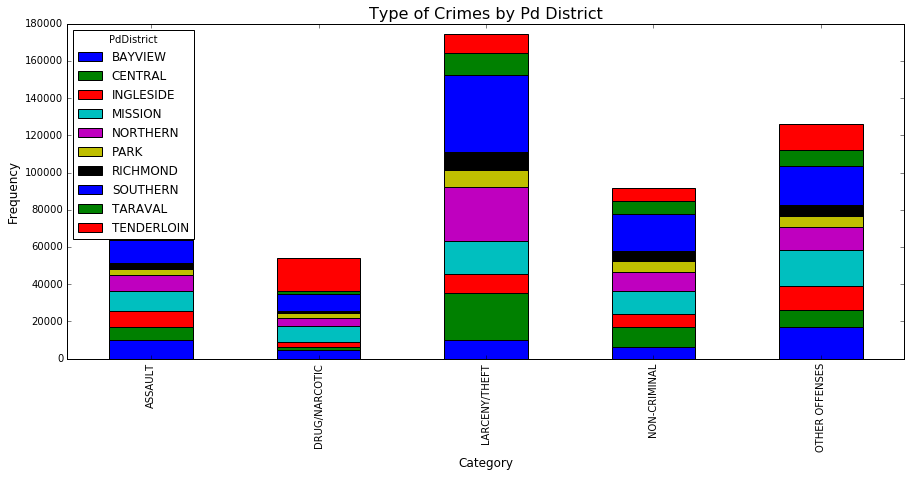

In [71]:
#Plot a stacked bar graph by Crime Category by Pd District
category_pdDistrict = crimes_subset.groupby(['Category','PdDistrict']).size()
category_pd_plot = category_pdDistrict.unstack().plot(
                                        kind='bar', 
                                        figsize=(15, 6), 
                                        stacked=True)
#Set text for title and axes
category_pd_plot.set_ylabel("Frequency", fontsize=12)
category_pd_plot.set_xlabel("Category", fontsize=12)
category_pd_plot.set_title("Type of Crimes by Pd District", fontsize=16)

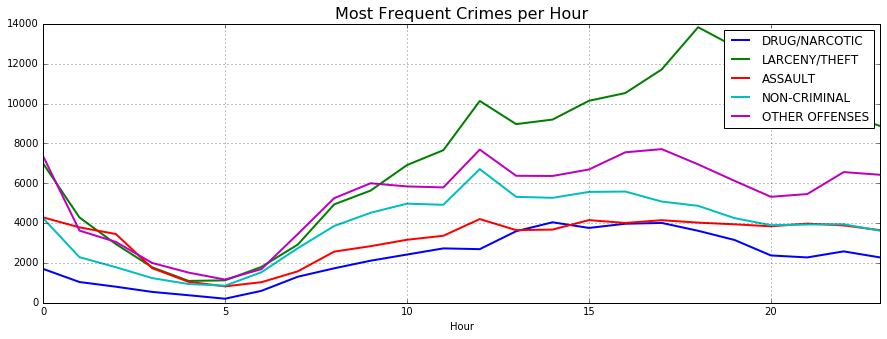

In [72]:
#Calculate number of most frequent crimes
assault = crimes_subset[crimes_subset['Category'] == 'ASSAULT']
hourFreqAssault = assault.groupby('Hour').size()
larceny = crimes_subset[crimes_subset['Category'] == 'LARCENY/THEFT']
hourFreqLarceny = larceny.groupby('Hour').size()
drugs = crimes_subset[crimes_subset['Category'] == 'DRUG/NARCOTIC']
hourFreqDrugs = drugs.groupby('Hour').size()
nonCriminal = crimes_subset[crimes_subset['Category'] == 'NON-CRIMINAL']
hourFreqNC = nonCriminal.groupby('Hour').size()
otherOffenses = crimes_subset[crimes_subset['Category'] == 'OTHER OFFENSES']
hourFreqOO = otherOffenses.groupby('Hour').size()

hours = np.arange(24)

#Plot each crime category by hour
fig, ax1 = plt.subplots(figsize=(15,5))
ax1.plot(hours, hourFreqDrugs, 
         hours, hourFreqLarceny, 
         hours, hourFreqAssault,
         hours, hourFreqNC,
         hours, hourFreqOO,
         linewidth=2.0)

#Set text for title and axes
ax1.set_xlabel('Hour')
ax1.legend(['DRUG/NARCOTIC', 'LARCENY/THEFT',  
            'ASSAULT', 'NON-CRIMINAL', 'OTHER OFFENSES'])
ax1.set_xlim(0, 23)
ax1.set_title('Most Frequent Crimes per Hour', fontsize=16)

#Set a grid in the background
plt.grid()

In [73]:
#Create new columns with the different time intervals
crimes_subset.loc[:,'IsDawning'] = ((crimes_subset['Hour'] >= 0) & 
                              (crimes_subset['Hour'] <= 6))
crimes_subset.loc[:,'IsMorning'] = ((crimes_subset['Hour'] >= 7) & 
                              (crimes_subset['Hour'] <= 12))
crimes_subset.loc[:,'IsAfternoon'] = ((crimes_subset['Hour'] >= 13) & 
                                (crimes_subset['Hour'] <= 18))
crimes_subset.loc[:,'IsNight'] = ((crimes_subset['Hour'] >= 19) & 
                            (crimes_subset['Hour'] <= 23))

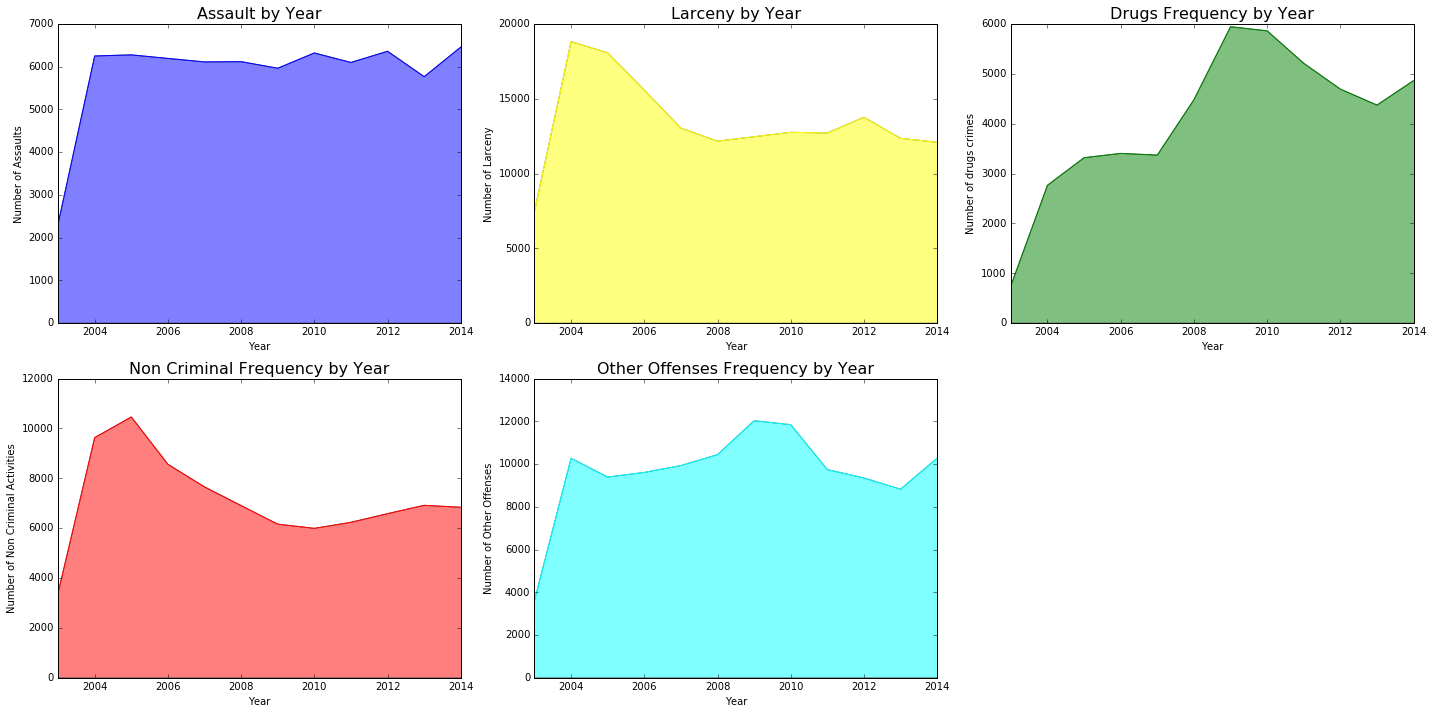

In [74]:
fig = plt.figure(figsize=(20,10))
fig.subplots_adjust(left=0.2, wspace=0.6)

#Calculate frequency of each crime category
assault_year = SF_train_data[SF_train_data['Category'] == 'ASSAULT']
assault_year = assault_year.groupby('Year').size()
larceny_year = SF_train_data[SF_train_data['Category'] == 'LARCENY/THEFT']
larceny_year = larceny_year.groupby('Year').size()
drugs_year = SF_train_data[SF_train_data['Category'] == 'DRUG/NARCOTIC']
drugs_year = drugs_year.groupby('Year').size()
nonCriminal_year = SF_train_data[SF_train_data['Category'] == 'NON-CRIMINAL']
nonCriminal_year = nonCriminal_year.groupby('Year').size()
otherOffenses_year = SF_train_data[SF_train_data['Category'] == 'OTHER OFFENSES']
otherOffenses_year = otherOffenses_year.groupby('Year').size()

#Get years on dataset
years = pd.unique(SF_train_data.Year.ravel())

#Plot each crime category by year
ax1 = fig.add_subplot(231)
ax1.plot(years, assault_year)
ax1.set_title('Assault by Year', fontsize=16)
ax1.set_ylabel('Number of Assaults')
ax1.set_xlabel('Year')
ax1.set_xlim(2003, 2014)
ax1.fill_between(years, assault_year, facecolor='blue', alpha=0.5)

ax2 = fig.add_subplot(232)
ax2.plot(years, larceny_year, color='yellow')
ax2.set_title('Larceny by Year', fontsize=16)
ax2.set_ylabel('Number of Larceny')
ax2.set_xlabel('Year')
ax2.set_xlim(2003, 2014)
ax2.fill_between(years, larceny_year, facecolor='yellow', alpha=0.5)

ax3 = fig.add_subplot(233)
ax3.plot(years, drugs_year, color='green')
ax3.set_title('Drugs Frequency by Year', fontsize=16)
ax3.set_ylabel('Number of drugs crimes')
ax3.set_xlabel('Year')
ax3.set_xlim(2003, 2014)
ax3.fill_between(years, drugs_year, facecolor='green', alpha=0.5)

ax4 = fig.add_subplot(234)
ax4.plot(years, nonCriminal_year, color='red')
ax4.set_title('Non Criminal Frequency by Year', fontsize=16)
ax4.set_ylabel('Number of Non Criminal Activities')
ax4.set_xlabel('Year')
ax4.set_xlim(2003, 2014)
ax4.fill_between(years, nonCriminal_year, facecolor='red', alpha=0.5)

ax5 = fig.add_subplot(235)
ax5.plot(years, otherOffenses_year, color='cyan')
ax5.set_title('Other Offenses Frequency by Year', fontsize=16)
ax5.set_ylabel('Number of Other Offenses')
ax5.set_xlabel('Year')
ax5.set_xlim(2003, 2014)
ax5.fill_between(years, otherOffenses_year, facecolor='cyan', alpha=0.5)

fig.tight_layout()

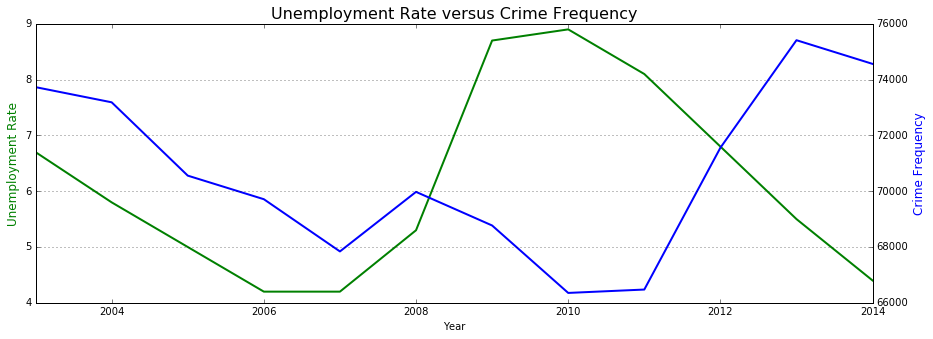

In [26]:
#Load dataset with unemployment rate
UnemploymentRate = pd.read_csv('UnemploymentRate1.csv')
UnemploymentRate.reindex(columns=['Year','UnemploymentRate'])
#Drop 2015 because is not complete
UnemploymentRate = UnemploymentRate.drop(
                    UnemploymentRate[UnemploymentRate['Year'] == 2015].index )
crimes_year = SF_train_data
crimes_year = crimes_year.drop(crimes_year[crimes_year['Year'] == 2015].index )
#Group the crimes by year
CrimePerYear = crimes_year.groupby('Year').size()

#Plot the unemployment rate vs the number of crimes through the years
fig, ax1 = plt.subplots(figsize=(15,5))
ax2 = ax1.twinx()
ax1.plot(UnemploymentRate['Year'], UnemploymentRate['UnemploymentRate']*100, 
         'g-', linewidth=2.0)
ax2.plot(UnemploymentRate['Year'], CrimePerYear , 'b-', linewidth=2.0)

#Set text for title and axes
ax1.set_xlabel('Year')
ax1.set_ylabel('Unemployment Rate', color='g', fontsize=12)
ax2.set_ylabel('Crime Frequency', color='b', fontsize=12)
ax1.set_xlim(2003, 2014)

plt.title("Unemployment Rate versus Crime Frequency", fontsize=16)
plt.grid(True)

#Save image as .png
plt.savefig('Unemployment Rate versus Crime Frequency')

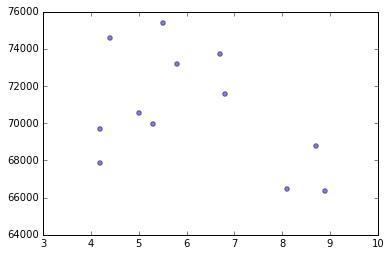

In [75]:
from matplotlib.backends.backend_pdf import PdfPages

#Test if there is any relationship between unemployment rate and crime frequency
plt.scatter(UnemploymentRate['UnemploymentRate']*100, CrimePerYear, alpha=0.5)

#Save the graph as pdf
pp = PdfPages('UnemploymentRateVsCrime.pdf')
pp.savefig()
pp.close()

In [76]:
#Hekper function for creating new column season
def get_season(x):
    summer=0
    fall=0
    winter=0
    spring=0
    if (x in [5, 6, 7]):
        summer=1
    if (x in [8, 9, 10]):
        fall=1
    if (x in [11, 0, 1]):
        winter=1
    if (x in [2, 3, 4]):
        spring=1
    return summer, fall, winter, spring

In [77]:
from sklearn.cross_validation import train_test_split
from sklearn import preprocessing

#Convert crime labels to numbers
le_crime = preprocessing.LabelEncoder()
crime = le_crime.fit_transform(crimes_subset.Category)

#Get binarized weekdays, districts, and hours.
days = pd.get_dummies(crimes_subset.DayOfWeek)
district = pd.get_dummies(crimes_subset.PdDistrict)
hour = pd.get_dummies(crimes_subset.Hour) 
 
#Create season columns
months = crimes_subset.loc[:,'Month']
crimes_subset.loc[:,'Summer'], crimes_subset.loc[:,'Fall'], crimes_subset.loc[:,'Winter'], crimes_subset.loc[:,'Spring'] = zip(*months.apply(get_season))

#Build new array with train data
train_data = pd.concat([hour, days, district, crimes_subset['IsIntersection'],  
                        crimes_subset['IsDawning'], crimes_subset['IsMorning'], 
                        crimes_subset['IsAfternoon'], crimes_subset['IsNight'], 
                        crimes_subset['Summer'], crimes_subset['Fall'], 
                        crimes_subset['Winter'], crimes_subset['Spring']], axis=1)
#Create array with classes - crime category
train_data['Crime'] = crime

<h3>Decision Trees</h3>

Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.
Reference: http://scikit-learn.org/stable/modules/tree.html


In [78]:
#Create a classification tree with max_depth=5 on all data
from sklearn.tree import DecisionTreeClassifier
#We can use as criterion the gini index
treeclf = DecisionTreeClassifier(max_depth=5, random_state=1, criterion='entropy')

In [79]:
#Create the features we want to fit into the model
features = ['IsIntersection', 'Friday', 'Monday', 'Saturday', 'Sunday', 
            'Thursday', 'Tuesday','Wednesday', 'BAYVIEW', 'CENTRAL', 
            'INGLESIDE', 'MISSION', 'NORTHERN', 'PARK', 'RICHMOND', 
            'SOUTHERN', 'TARAVAL', 'TENDERLOIN', 'IsDawning', 'IsMorning', 
            'IsAfternoon', 'IsNight', 'Summer', 'Fall', 'Winter', 'Spring']

In [80]:
#Fit the model and calculate the accuracy
training, validation = train_test_split(train_data, train_size=.70)

treeclf.fit(training[features], training['Crime'])
#Quantity of target information explained by the model
treeclf.score(training[features], training['Crime'])

0.37984875226079307

In [92]:
#Compute the importance of each feature and sorted it in descending order
df = pd.DataFrame({'feature':features, 'importance':treeclf.feature_importances_})
df.sort_values(by=['importance'], ascending=[False]).head(6)

,feature,importance
17,TENDERLOIN,0.351683
0,IsIntersection,0.297079
8,BAYVIEW,0.123091
11,MISSION,0.093507
10,INGLESIDE,0.088979
18,IsDawning,0.022453


In [93]:
from sklearn import metrics
#Generate evaluation metrics
predicted = treeclf.predict(validation[features])
print metrics.accuracy_score(validation['Crime'], predicted)
#Againts the score result of 0.37984875226079307

0.381731020546


<h3>Cross Validation</h3>

Cross Validation it is mainly used in settings where the goal is prediction, and one wants to estimate how accurately a predictive model will perform in practice.
It is used to avoid overfitting on the model, that means, the situation where a model would fail to predict anything useful on yet-unseen data.
Reference: http://scikit-learn.org/stable/modules/cross_validation.html

In [94]:
from sklearn.cross_validation import cross_val_score
#Evaluate the model using 10-fold cross-validation
scores = cross_val_score(DecisionTreeClassifier(), 
                         training[features], 
                         training['Crime'], 
                         scoring='accuracy', 
                         cv=10)
print scores
print scores.mean()
#Compare with the original score of 0.37984875226079307

[ 0.38509453  0.38050486  0.38431276  0.37929621  0.38180974  0.38421398
  0.38530681  0.38571663  0.37903336  0.38270492]
0.382799379629


In [95]:
#MSE - may be used for comparative purposes to see how well a model explain a given set of observations
np.sqrt(metrics.mean_squared_error(validation['Crime'], predicted))

1.527719277960462

In [96]:
print features
le_crime.classes_

['IsIntersection', 'Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday', 'BAYVIEW', 'CENTRAL', 'INGLESIDE', 'MISSION', 'NORTHERN', 'PARK', 'RICHMOND', 'SOUTHERN', 'TARAVAL', 'TENDERLOIN', 'IsDawning', 'IsMorning', 'IsAfternoon', 'IsNight', 'Summer', 'Fall', 'Winter', 'Spring']


array(['ASSAULT', 'DRUG/NARCOTIC', 'LARCENY/THEFT', 'NON-CRIMINAL',
       'OTHER OFFENSES'], dtype=object)

In [97]:
#Predict type of crime if it is an intersection, Thursday, Mission Pd District, isDawning and Fall 
treeclf.predict_proba(np.array([1, 0, 0, 0, 0, 1, 0, 0,
                                0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
                                1, 0, 0, 0, 0, 1, 0, 0]).reshape(1,-1))


array([[ 0.10170151,  0.1183274 ,  0.24560721,  0.15152358,  0.3828403 ]])

In [98]:
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 
from IPython.display import Image  

#Create a graphviz decision tree
dot_data = StringIO() 
export_graphviz(treeclf, out_file=dot_data, 
                        feature_names=features,
                        class_names=le_crime.classes_, 
                        filled = True,
                        rounded = True,
                        proportion = True,
                        special_characters=True) 
#Save it as .png
graph = pydot.graph_from_dot_data(dot_data.getvalue()) 
pydot.graph_from_dot_data(dot_data.getvalue()).write_png("SF_Crime_DecisionTree.png")

True

<h3>Logistic Regression</h3>

Logistic regression, despite its name, is a linear model for classification rather than regression. Logistic regression is also known in the literature as logit regression, maximum-entropy classification (MaxEnt) or the log-linear classifier. In this model, the probabilities describing the possible outcomes of a single trial are modeled using a logistic function.
Reference: http://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

In [99]:
from sklearn import linear_model

logreg = linear_model.LogisticRegression()
logreg.fit(training[features], training['Crime'])
logreg.score(training[features], training['Crime'])

0.3829141417728989

In [100]:
predicted = logreg.predict(validation[features])
#Calculate MSE and compare it with Decision Tree MSE = 1.527719277960462
#The lowest value if the best estimator for our model.
np.sqrt(metrics.mean_squared_error(validation['Crime'], predicted))

1.5889863947468799